# Data Analysis Codes

In [ ]:
######## SCRATCHDCDCD

## Matching

In [34]:
ipv0 <- read.csv("campers_ipv_for_analysis_corrected_match_wealth.csv")
colnames(ipv0)

[1] "X.1"                 "X"                   "RespondentID"       
 [4] "Year"                "Age"                 "Region"             
 [7] "Educ.Level"          "Educ.Years"          "Educ.Attained"      
[10] "Wealth.Index"        "Wealth.Index.Rural"  "Marital"            
[13] "Husb.Educ.Level"     "Husb.Educ.Years"     "Husb.Employment"    
[16] "Employment"          "Husb.Educ.Attained"  "Husb.Age"           
[19] "Emotional.IPV"       "Less.Physic.IPV"     "More.Physic.IPV"    
[22] "Sexual.IPV"          "Husb.Employment.Bin" "Employment.Bin"     
[25] "LPG"                 "Physical.IPV"        "ANY.IPV"            
[28] "Counts.IPV"          "Male"                "Female"

In [36]:
ipv0$Marital <- factor(ipv0$Marital)
ipv0$Husb.Educ.Level <- factor(ipv0$Husb.Educ.Level)
ipv0$Educ.Level <- factor(ipv0$Educ.Level)
ipv0$Region <- factor(ipv0$Region)
ipv0$Wealth.Index <- factor(ipv0$Wealth.Index)

In [35]:
cor(ipv0$Wealth.Index, ipv0$Educ.Level)
cor(ipv0$Wealth.Index, ipv0$Husb.Educ.Level)

[1] 0.5108563

[1] 0.5539131

In [19]:
# install.packages(c("Matching","rgenoud","MatchIt"))
library(MatchIt)
m.out <- matchit(
  Husb.Employment.Bin ~ Age + Region + Educ.Level + Marital + Husb.Educ.Level,
  data = ipv0,
  method = "cem",
  distance = "glm")

In [20]:
m.out.2 <- matchit(
  Husb.Employment.Bin ~ Age + Region + Educ.Level + Marital + Husb.Educ.Level,
  data = ipv0,
  method = "cem",
  distance = "glm",
  link = "logit",
  ratio=1)

ipv_match.2 <- match.data(m.out.2)

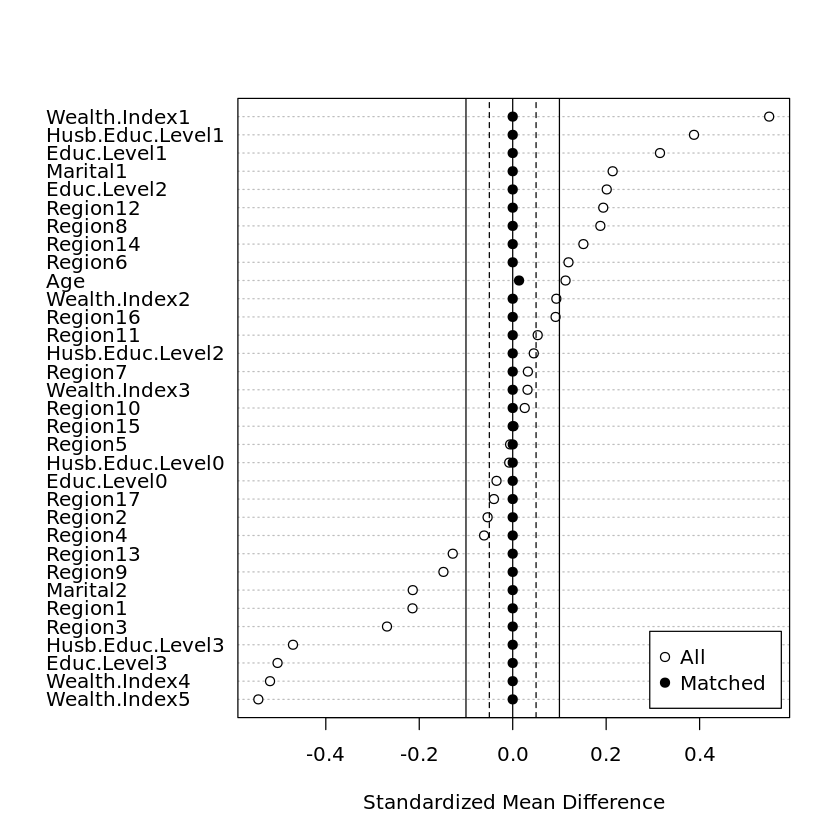

In [11]:
plot(summary(m.out.2),
     var.order = "unmatched", abs = FALSE)

In [21]:
m.out.3 <- matchit(
  Employment.Bin ~ Age + Region + Educ.Level + Marital + Husb.Educ.Level,
  data = ipv_match.2,
  method = "cem",
  distance = "glm",
  link = "logit",
  ratio=1)

ipv_match.3 <- match.data(m.out.3,  weights = "wts", subclass = "sub2")

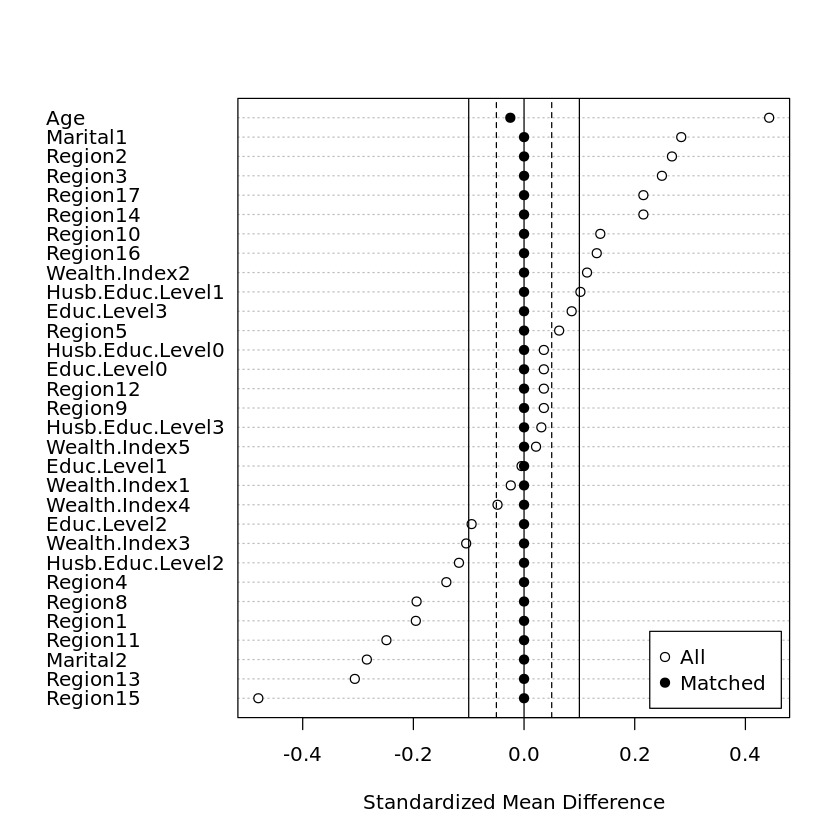

In [12]:
plot(summary(m.out.3),
     var.order = "unmatched", abs = FALSE)

In [23]:
m.out.4 <- matchit(
  Employment.Bin ~ Age + Region + Educ.Level + Marital + Husb.Educ.Level,
  data = ipv0,
  method = "cem",
  distance = "glm",
  link = "logit",
  ratio=1)

ipv_match.4 <- match.data(m.out.4)

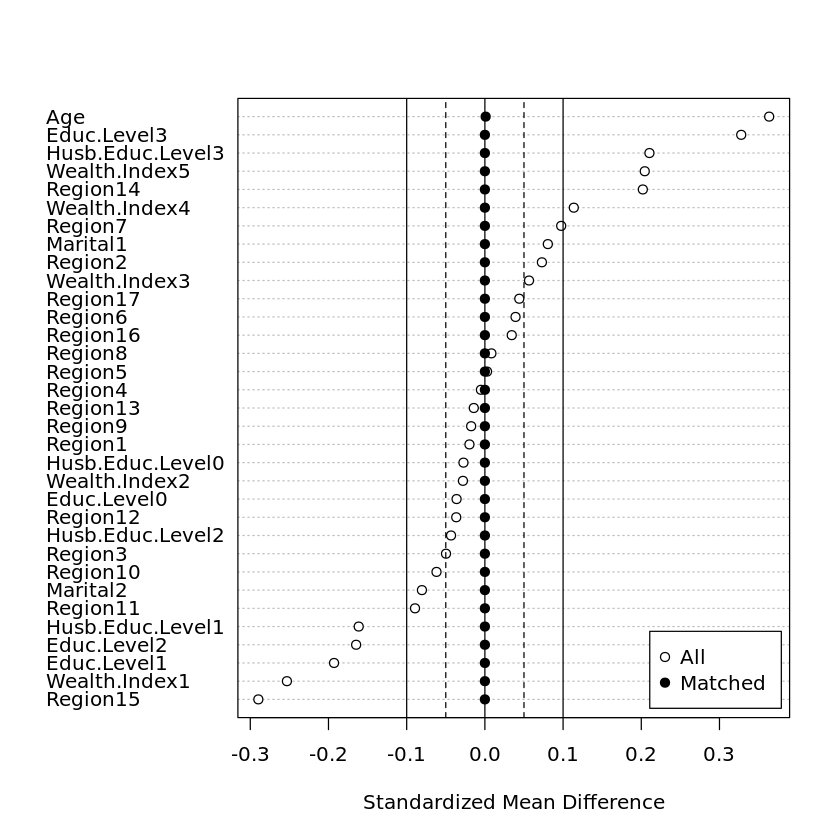

In [13]:
plot(summary(m.out.4),
     var.order = "unmatched", abs = FALSE)

In [24]:
m.out.5 <- matchit(
  Husb.Employment.Bin ~ Age + Region + Educ.Level + Marital + Husb.Educ.Level,
  data = ipv_match.4,
  method = "cem",
  distance = "glm",
  link = "logit",
  ratio=1)

ipv_match.5 <- match.data(m.out.5,  weights = "wts", subclass = "sub2")

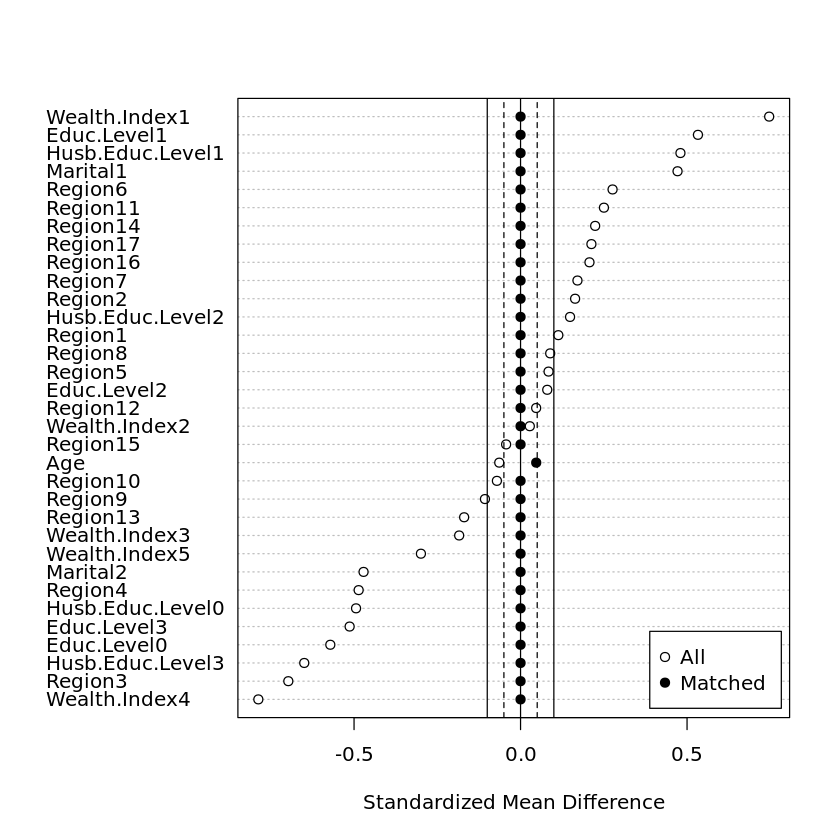

In [14]:
plot(summary(m.out.5),
     var.order = "unmatched", abs = FALSE)

In [30]:
ipv.M.pois <- glm(Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + (Husb.Employment.Bin * Employment.Bin) + Age
                            + Region + Marital + Educ.Level + Husb.Educ.Level, family = poisson, weights = wts, data = ipv_match.3)
summary(ipv.M.pois)
vif(ipv.M.pois)


Call:
glm(formula = Counts.IPV ~ Husb.Employment.Bin + Employment.Bin + 
    (Husb.Employment.Bin * Employment.Bin) + Age + Region + Marital + 
    Educ.Level + Husb.Educ.Level, family = poisson, data = ipv_match.3, 
    weights = wts)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.78134  -0.51912  -0.26912  -0.09712   2.81125  

Coefficients: (1 not defined because of singularities)
                                     Estimate Std. Error z value Pr(>|z|)   
(Intercept)                         -19.53370 3650.90646  -0.005  0.99573   
Husb.Employment.Bin                   1.34957    1.10247   1.224  0.22090   
Employment.Bin                        2.05865    1.13339   1.816  0.06931 . 
Age                                   0.04882    0.05224   0.934  0.35005   
Region2                             -17.78960 1309.42043  -0.014  0.98916   
Region3                              -2.71695    0.93925  -2.893  0.00382 **
Region4                              -1.6886

ERROR: Error in vif(ipv.M.pois): could not find function "vif"


In [ ]:
# Multicollinearity

# install.packages("regclass")
# library(regclass)
VIF(ipv.pois)

,GVIF,Df,GVIF^(1/(2*Df))
LPG,1.063519,3,1.010317
Husb.Educ.Level,1.066389,3,1.010771
Region,1.114209,18,1.003009
Age,1.151518,1,1.073088
Marital,1.149609,1,1.072198


In [ ]:
# Test for Overdispersion
mean(ipv$Counts.IPV)
var(ipv$Counts.IPV)

# install.packages("AER")
# library(AER)
dispersiontest(ipv.pois, alternative = "greater")

# for some reason, di gumagana AER dito. pero significant yung dispersion test sa R, 
# thus overdispersed

[1] 0.4023935

[1] 0.6003949

ERROR: Error in dispersiontest(ipv.pois, alternative = "greater"): could not find function "dispersiontest"


Negative Binomial Fit

In [ ]:
install.packages("MASS")
library(MASS)

Installing package into ‘/work/.R/library’
(as ‘lib’ is unspecified)



In [ ]:
ipv.nb <- glm.nb(Counts.IPV ~ LPG + Husb.Educ.Level + Region + Age + Marital,
                     data = ipv)
summary(ipv.nb)


Call:
glm.nb(formula = Counts.IPV ~ LPG + Husb.Educ.Level + Region + 
    Age + Marital, data = ipv, init.theta = 0.8515076133, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1830  -0.8296  -0.7215   0.3168   5.4150  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.497746   0.182050  -8.227  < 2e-16 ***
LPGBoth employed         0.179536   0.036786   4.881 1.06e-06 ***
LPGBoth unemployed      -0.578160   0.392445  -1.473  0.14069    
LPGFemale only Employed  0.381313   0.277240   1.375  0.16901    
Husb.Educ.Level1         0.429063   0.138548   3.097  0.00196 ** 
Husb.Educ.Level2         0.349152   0.138408   2.523  0.01165 *  
Husb.Educ.Level3         0.063312   0.141363   0.448  0.65425    
Region2                  0.195212   0.119893   1.628  0.10348    
Region3                 -0.045459   0.108859  -0.418  0.67624    
Region4                  0.214389   0.119476   1.794  0.07275 .  
Regi

Variable Selection (Backward Elimination)

In [ ]:
# no marital
ipv.nb_no.marital <- glm.nb(Counts.IPV ~ LPG + Husb.Educ.Level + Region + Age,
                            data = ipv)
summary(ipv.nb_no.marital)
anova(ipv.nb, ipv.nb_no.marital)


Call:
glm.nb(formula = Counts.IPV ~ LPG + Husb.Educ.Level + Region + 
    Age, data = ipv, init.theta = 0.8230242621, link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0941  -0.8353  -0.7338   0.3550   5.6610  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.137878   0.178004  -6.392 1.63e-10 ***
LPGBoth employed         0.173642   0.036907   4.705 2.54e-06 ***
LPGBoth unemployed      -0.488231   0.393417  -1.241  0.21461    
LPGFemale only Employed  0.397523   0.278408   1.428  0.15334    
Husb.Educ.Level1         0.431141   0.139130   3.099  0.00194 ** 
Husb.Educ.Level2         0.362530   0.138984   2.608  0.00910 ** 
Husb.Educ.Level3         0.055070   0.141932   0.388  0.69801    
Region2                  0.118689   0.119775   0.991  0.32172    
Region3                 -0.074329   0.108971  -0.682  0.49518    
Region4                  0.188899   0.120069   1.573  0.11566    
Region5       

Model,theta,Resid. df,2 x log-lik.,Test,df,LR stat.,Pr(Chi)
<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
LPG + Husb.Educ.Level + Region + Age,0.8230243,11756,-19475.99,,NA,NA,NA
LPG + Husb.Educ.Level + Region + Age + Marital,0.8515076,11755,-19402.52,1 vs 2,1,73.46829,0


In [ ]:
# no educ
ipv.nb_no.educ <- glm.nb(Counts.IPV ~ LPG + Region + Age + Marital,
                         data = ipv)
summary(ipv.nb_no.educ)
anova(ipv.nb, ipv.nb_no.educ)

In [ ]:
# no region
ipv.nb_no.region <- glm.nb(Counts.IPV ~ LPG + Husb.Educ.Level + Age + Marital,
                 data = ipv)
summary(ipv.nb_no.region)
anova(ipv.nb, ipv.nb_no.region)

In [ ]:
# no age
ipv.nb_no.age <- glm.nb(Counts.IPV ~ LPG + Husb.Educ.Level + Region + Marital,
                 data = ipv)
summary(ipv.nb_no.age)
anova(ipv.nb, ipv.nb_no.age)

All factors contribute significantly to the model. The final model is the NB model.

In [ ]:
# Intercept-only (NB)
ipv.int.nb <- glm.nb(Counts.IPV ~ 1, data = ipv)

Diagnostics of the Final Fit

In [ ]:
# Goodness-of-Fit
anova(ipv.nb, ipv.int.nb) # pwede ring lrtest() pero di gumagana here

Model,theta,Resid. df,2 x log-lik.,Test,df,LR stat.,Pr(Chi)
<chr>,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,0.7119139,11781,-19770.75,,NA,NA,NA
LPG + Husb.Educ.Level + Region + Age + Marital,0.8515076,11755,-19402.52,1 vs 2,26,368.2286,0


In [ ]:
# Multicollinearity
VIF(ipv.nb)

,GVIF,Df,GVIF^(1/(2*Df))
LPG,1.063461,3,1.010308
Husb.Educ.Level,1.069871,3,1.011320
Region,1.116336,18,1.003062
Age,1.145990,1,1.070509
Marital,1.145154,1,1.070119


## Logistic Regression Analysis (try lang)

Data Preparation

In [ ]:
ipv3 <- ipv
val <- c(2, 3, 9, 10, 19)

ipv3["Counts.IPV"] <- sapply(ipv3["Counts.IPV"], 
                             function(x) replace(x, x %in% val, 1))

Logistic Fit

In [ ]:
ipv3.log <- glm(Counts.IPV ~ LPG + Husb.Educ.Level + Region + Age + Marital,
                family = binomial, data = ipv3)
summary(ipv3.log) # pangit pa rin


Call:
glm(formula = Counts.IPV ~ LPG + Husb.Educ.Level + Region + Age + 
    Marital, family = binomial, data = ipv3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2384  -0.8241  -0.6923   1.3230   2.3065  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.666366   0.214596  -7.765 8.16e-15 ***
LPGBoth employed         0.216885   0.043637   4.970 6.69e-07 ***
LPGBoth unemployed      -0.651499   0.449578  -1.449 0.147300    
LPGFemale only Employed  0.381582   0.338113   1.129 0.259082    
Husb.Educ.Level1         0.509426   0.162728   3.131 0.001745 ** 
Husb.Educ.Level2         0.416981   0.162486   2.566 0.010280 *  
Husb.Educ.Level3         0.157582   0.165563   0.952 0.341203    
Region2                  0.203561   0.142805   1.425 0.154030    
Region3                  0.051457   0.127157   0.405 0.685719    
Region4                  0.250391   0.142541   1.757 0.078981 .  
Region5                  0

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8672f010-76e5-4fe5-a087-2513d801c0e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>